## Observations and Insights 

OBSERVATIONS: 
- It would be interesting to analyze if the same amount of mice per gender were treated with the same drug regimen. Overall, we can see that the amount of female and male mice was proportional; however, it is an entertaining exercise to analyze if the drug treatments have different effects according to the mice's gender. 
- In the graph about the tumor volume vs. time in a mouse treated with Capomulin, it is possible to see how effective was the treatment. Nevertheless, it is not a signal that the treatment was working for all the mice, because for confirming that it is necessary to analyze all the mice that receive that drug regimen. 
- The fact of not having the same amount of Timepoints for each mouse does not mean that the data is incomplete or that it is necessary to clean it up more for making that number even. That could give some information about how the treatments acted in the time and how efficient or not they were.   

In [119]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)

In [2]:
# Mouse metadata overview
mouse_metadata_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
# Study result overview
study_results_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the data into a single dataset
Final_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID") 
# Display the data table for preview
print(f'The shape of the DataFrame with all the information is: {Final_df.shape}')
Final_df

The shape of the DataFrame with all the information is: (1893, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mice_number = Final_df["Mouse ID"].unique()
print(f'The number of mice is: {len(mice_number)}')

The number of mice is: 249


In [6]:
# Getting the number of Timepoints and how many types each one repeated
count_timepoint = Final_df["Timepoint"].value_counts()
count_timepoint

0     250
5     238
10    223
15    207
20    195
25    183
30    171
35    154
40    142
45    130
Name: Timepoint, dtype: int64

Having the number of mice and the times that each of the Timepoints appears, we can see that it is necessary to clean the data because if there are 249 mice and each of them would have the right measures - 10 Timepoints-, then each Timepoint should appear 249 times in the DataFrame. However, according to how many times each of the Timepoints repeated it is possible to see that there are Timepoints with more than 249 replications, which means that there are mouses with duplicate Timepoints. 

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_repeated_timepoint = Final_df["Mouse ID"].value_counts()

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
Duplicate_mouse_ID = Final_df[Final_df["Mouse ID"].isin(mouse_repeated_timepoint.index[mouse_repeated_timepoint.gt(10)])]
Duplicate_mouse_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Final_df = Final_df[Final_df["Mouse ID"].isin(mouse_repeated_timepoint.index[mouse_repeated_timepoint.le(10)])]
print(Final_df.shape)
Final_df

(1880, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
mice_number = Final_df["Mouse ID"].unique()
print(f'After cleaning, the new number of mice is {len(mice_number)}')

After cleaning, the new number of mice is 248


In [11]:
#Final verification of not having mice with the same ID and equal Timepoint getting only Flase values in the duplicated function 
Final_df.duplicated(["Mouse ID","Timepoint"]).value_counts()

False    1880
dtype: int64

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
Summary_Table = pd.DataFrame()
Summary_Table["Mean"] = Final_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
Summary_Table["Median"] = Final_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
Summary_Table["Variance"] = Final_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
Summary_Table["Standard Deviation"] = Final_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
Summary_Table["Standard Error of the Mean (SEM) "] = Final_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
Summary_Table

,Mean,Median,Variance,Standard Deviation,Standard Error of the Mean (SEM)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

,Drug Regimen,Number of mice
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


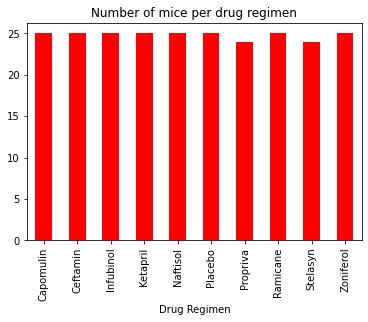

In [13]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
Total_mice = Final_df.loc[:, ["Mouse ID", "Drug Regimen"]]
Total_mice = Total_mice.drop_duplicates()
Total_mice = Total_mice.groupby(["Drug Regimen"]).count()
Total_mice = Total_mice.reset_index()
Total_mice = Total_mice.rename(columns={"Mouse ID": "Number of mice"})

plot = Total_mice.plot.bar(x ="Drug Regimen", color = 'red',legend=None, title = "Number of mice per drug regimen")
Total_mice

Text(0.5, 1.0, 'Number of mice per drug regimen')

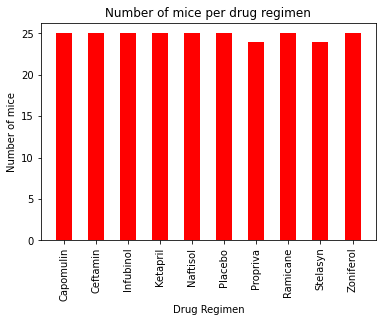

In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_values = np.arange(len(Total_mice))
y_values = Total_mice["Number of mice"]
list_values = Total_mice["Drug Regimen"]
plt.bar(x_values,y_values, color= 'r', align="center",width = 0.5)
plt.xticks(x_values, list_values, rotation='vertical')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of mice")
plt.title("Number of mice per drug regimen")

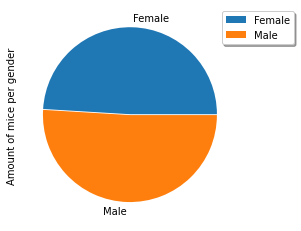

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_mice = pd.DataFrame()
Gender_mice["Gender"] = ["Female", "Male"]
female = Final_df[Final_df["Sex"]=="Female"]["Mouse ID"].count()
male = Final_df[Final_df["Sex"]=="Male"]["Mouse ID"].count()
Gender_mice["Amount of mice per gender"] = [female,male]
Gender_mice = Gender_mice.set_index("Gender")
plot = Gender_mice.plot.pie(y='Amount of mice per gender', explode=[0.01,0]).legend(bbox_to_anchor=(0.9, 1), shadow= True)

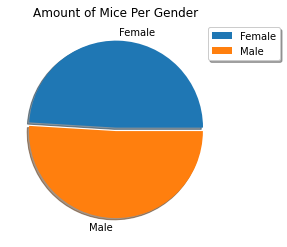

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Gender_mice["Amount of mice per gender"], labels = ["Female", "Male"], shadow = True, explode = [0.04,0])
plt.title("Amount of Mice Per Gender")
plt.legend(bbox_to_anchor=(0.9, 1), shadow= True)

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
Final_tumor_df = Final_df.groupby(["Mouse ID"],as_index=False)["Timepoint"].max()
Final_tumor_df = Final_tumor_df.rename(columns = {"Timepoint":"Final_Timepoint"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Final_tumor_df = pd.merge(Final_tumor_df, Final_df, on = "Mouse ID")
Final_tumor_df = Final_tumor_df.loc[Final_tumor_df["Final_Timepoint"]==Final_tumor_df['Timepoint']]
Final_tumor_df = Final_tumor_df.reset_index()
Final_tumor_df


,index,Mouse ID,Final_Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,9,a203,45,Infubinol,Female,20,23,45,67.973419,2
1,19,a251,45,Infubinol,Female,21,25,45,65.525743,1
2,29,a262,45,Placebo,Female,17,29,45,70.717621,4
3,39,a275,45,Ceftamin,Female,20,28,45,62.999356,3
4,46,a366,30,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...,...,...
243,1839,z435,10,Propriva,Female,12,26,10,48.710661,0
244,1849,z578,45,Ramicane,Male,11,16,45,30.638696,0
245,1859,z581,45,Infubinol,Female,24,25,45,62.754451,3
246,1869,z795,45,Naftisol,Female,13,29,45,65.741070,3


In [70]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol= list()
tumor_vol_plot = list()
quartiles_list = list()
lowerq_list = list()
upperq_list = list()
iqr = list()
lower_bound = list()
upper_bound = list()
median = list()
calculations = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treat in treatments_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol= Final_tumor_df.loc[Final_tumor_df['Drug Regimen']==treat,['Tumor Volume (mm3)']]
    tumor_vol= tumor_vol["Tumor Volume (mm3)"]
    # add subset 
    tumor_vol_plot.append(tumor_vol)
    # Determine outliers using upper and lower bounds
    
    q = tumor_vol.quantile([.25,.5,.75])
    lowerq_list.append(q[0.25])
    upperq_list.append(q[0.75])
    iqr.append(q[0.75]-q[0.25])
    lower_bound.append((q[0.25]-(1.5*(q[0.75]-q[0.25]))))
    upper_bound.append((q[0.75]+(1.5*(q[0.75]-q[0.25]))))
    median.append(q[0.5])
    
calculations["Drug Regimen"] = treatments_list
calculations["Lower Quartile"] = lowerq_list
calculations["Upper Quartile"] = upperq_list
calculations["Interquartile Range"] = iqr
calculations["Median"] = median
calculations["Lower Bound"] = lower_bound
calculations["Upper Bound"] = upper_bound
calculations

,Drug Regimen,Lower Quartile,Upper Quartile,Interquartile Range,Median,Lower Bound,Upper Bound
0,Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458


The calculations DataFrame has the values for lower quartile, the upper quartile, interquartile range IQR, the median, and the upper and lower bounds for each treatment. The final tumor volume points higger than the upper bound and lower than the lower bound could be consider outliers for each drug regimen. 

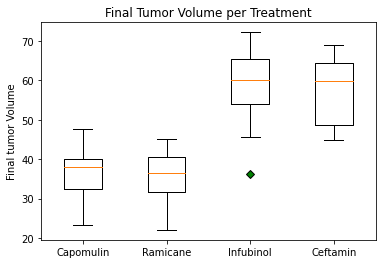

In [83]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume per Treatment')
ax1.set_ylabel('Final tumor Volume')
ax1.boxplot(tumor_vol_plot,flierprops=green_diamond)
plt.xticks([1,2,3,4], treatments_list)
plt.show()

## Line and Scatter Plots

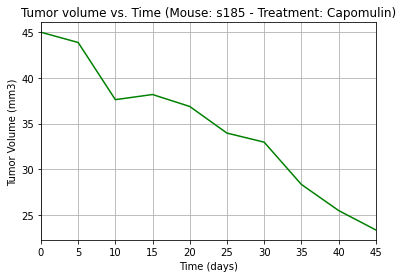

In [111]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capomulin = Final_df.loc[Final_df["Drug Regimen"] == "Capomulin"]
mouse_capomulin = mouse_capomulin.loc[Final_df["Mouse ID"]== "s185"]
fig = plt.figure()
plt.plot(mouse_capomulin["Timepoint"],mouse_capomulin["Tumor Volume (mm3)"], color='green')
plt.title("Tumor volume vs. Time (Mouse: s185 - Treatment: Capomulin)")
plt.xlim(0,45)
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.show()

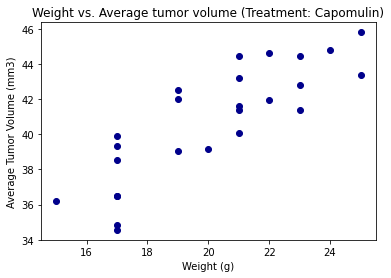

In [117]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_capomulin = Final_df.loc[Final_df["Drug Regimen"] == "Capomulin"]
mice_capomulin_average = mice_capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mice_capomulin = pd.merge(mice_capomulin_average,mice_capomulin, on="Mouse ID")
mice_capomulin = mice_capomulin.drop_duplicates(["Mouse ID"])
mice_capomulin = mice_capomulin.reset_index()
mice_capomulin = mice_capomulin.rename(columns={"Tumor Volume (mm3)_x":"Average Tumor Volume"})

fig = plt.figure()
plt.scatter(mice_capomulin["Weight (g)"],mice_capomulin["Average Tumor Volume"], color='darkblue')
plt.title("Weight vs. Average tumor volume (Treatment: Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

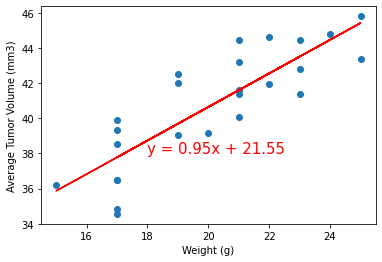

The correlation coefficient is: 0.8419363424694718


In [125]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = mice_capomulin["Weight (g)"]
y_values = mice_capomulin["Average Tumor Volume"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
print(f"The correlation coefficient is: {rvalue}")